k=1, execution time: 2.30812668800354 seconds
k=2, execution time: 2.235588312149048 seconds
k=3, execution time: 2.3806612491607666 seconds
k=4, execution time: 2.203583002090454 seconds
k=5, execution time: 2.20558500289917 seconds
k=6, execution time: 2.1435649394989014 seconds
k=7, execution time: 2.1645617485046387 seconds
k=8, execution time: 2.189549446105957 seconds
k=9, execution time: 2.173055410385132 seconds
k=10, execution time: 2.1180460453033447 seconds
k=11, execution time: 2.2105791568756104 seconds
k=12, execution time: 2.212576389312744 seconds
k=13, execution time: 2.2811012268066406 seconds
k=14, execution time: 2.249091386795044 seconds
k=15, execution time: 2.2560946941375732 seconds
k=16, execution time: 2.285597324371338 seconds
k=17, execution time: 2.3110997676849365 seconds
k=18, execution time: 2.303098678588867 seconds
k=19, execution time: 2.318086624145508 seconds
k=20, execution time: 2.308234214782715 seconds
First 10 elements after sorting: [0, 1, 2, 

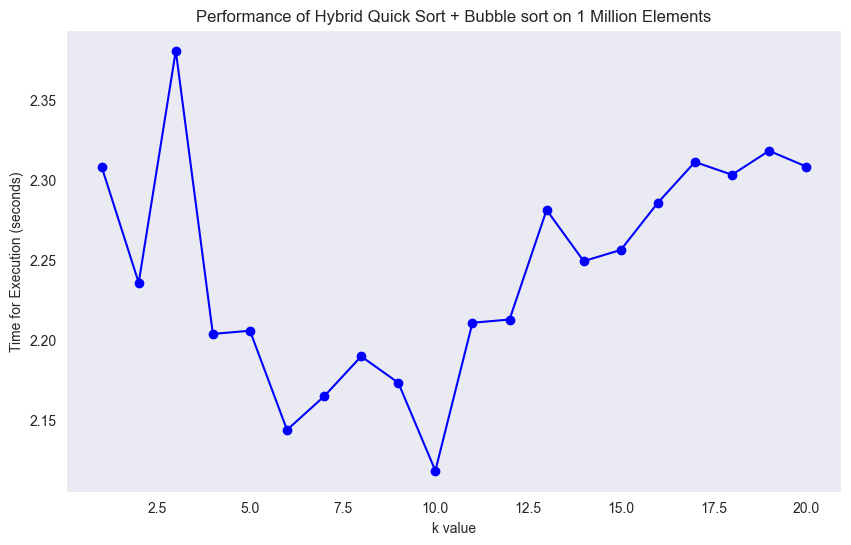

In [29]:
#File Name: Hw4Q3-2Code_Pathak
#Name: Shivam Pathak
#Date: 03/14/25
import random
import time
import matplotlib.pyplot as plt

 #Buble sort for small sub arrays
def newbubblesort(arr, left, right):
    for i in range(left, right):
        swapped = False
        for j in range(left, right - (i - left)):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
                swapped = True
        if not swapped:
            break  #


#Quicksort with partition
def partition(arr, low, high):
    if low >= high:
        return high #Avoid out of bounds index error
    pivot = arr[high] #Pivot Select
    i = low - 1
    for j in range(low, high):
        if arr[j] <= pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
    arr[i+1], arr[high] = arr[high], arr[i+1]
    return i + 1

#Hybrid quicksort with bubblesort for small arrays
def hybrid_quick_sort(arr, low, high, k):
    if low < high:
        if (high - low + 1) <= k:
        #buble sort when size <= k
            newbubblesort(arr, low, high)
        else:
            pivot = partition(arr, low, high)
            hybrid_quick_sort(arr, low, pivot - 1, k)
            hybrid_quick_sort(arr, pivot + 1, high, k)

#Read file
def read_file(filename):
    with open(filename, "r") as file:
        return list(map(int, file.read().split())) #convert to int list

#Testing
def test_sort_performance():
    filename = "rand1000000.txt"
    original_data = read_file(filename) #read file

    k_values = list(range(1,21))
    results = {}

    for k in k_values:
        arr = original_data.copy()
        start = time.time()
        hybrid_quick_sort(arr, 0, len(arr) - 1, k)
        end = time.time()
        results[k] = end - start #store the execution time
        print(f"k={k}, execution time: {results[k]} seconds")  # Debugging

    print(f"First 10 elements after sorting: {arr[:10]}")  # Debugging


    return results

#Run the  test
results = test_sort_performance()
plt.figure(figsize=(10, 6))
plt.plot(list(results.keys()), list(results.values()), marker='o', linestyle='-', color='b')
plt.xlabel("k value")
plt.ylabel("Time for Execution (seconds)")
plt.title("Performance of Hybrid Quick Sort + Bubble sort on 1 Million Elements")
plt.grid()
plt.show()


